In [27]:
%matplotlib notebook
%matplotlib inline

from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [28]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [29]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [30]:

# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
con = engine.connect()

In [31]:

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [32]:

# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [33]:

# Save references to each table
measurement = Base.classes.measurement

Station = Base.classes.station

In [34]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [35]:

# Find the most recent date in the data set.
last_day = session.query(measurement.date).order_by(measurement.date.desc()).first()
last_day

('2017-08-23',)

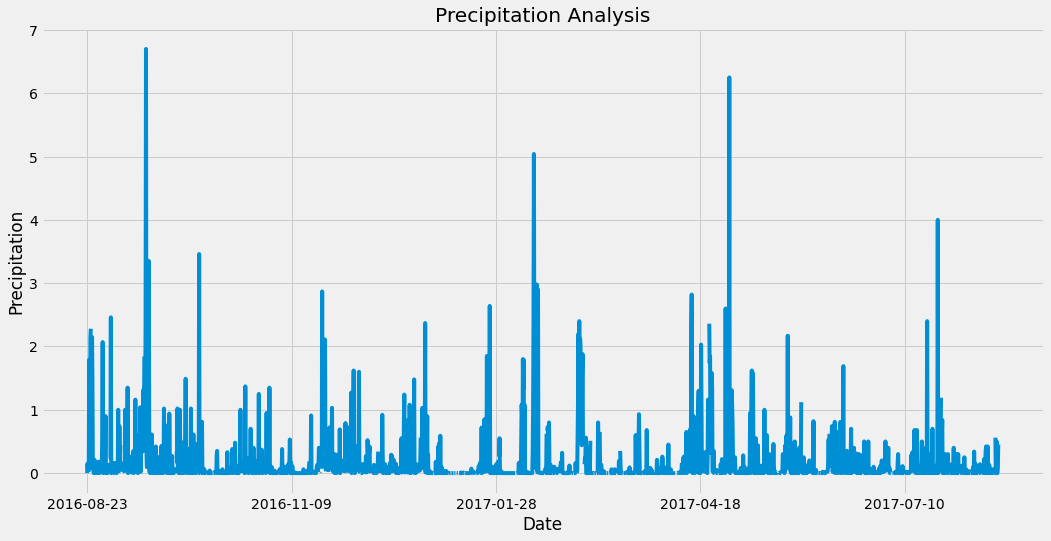

In [36]:
# Calculate the date one year from the last date in data set.
one_more_year = dt.date(2017,8,23) - dt.timedelta(days=365)
one_more_year

# Design a query to retrieve the last 12 months of precipitation data and plot the results.
precip_data = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= one_more_year).\
    order_by(measurement.date).all()


# Starting from the most recent data point in the database.

# Perform a query to retrieve the data and precipitation scores
all_scores = session.query(measurement.date, measurement.prcp).order_by(measurement.date.desc()).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
precip_df = pd.DataFrame(precip_data, columns=["Date","Precipitation"])
precip_df.set_index("Date", inplace=True,)
precip_df.head()

# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot (title="Precipitation Analysis", ylabel="Precipitation", legend="", figsize=(16,8))
plt.show()

In [37]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()


,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [38]:

# Design a query to calculate the total number stations in the dataset
stat_tot = session.query(measurement.station).distinct().count()
stat_tot

9

In [39]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_activity = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
most_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

topstations_df = pd.DataFrame(top_stations, columns=['Station','Count'])
most_activity = topstations_df.iloc[0].station
most_activity

In [40]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [func.min(measurement.tobs), 
       func.max(measurement.tobs), 
       func.avg(measurement.tobs)]

station_stats = session.query(*sel).\
    filter(measurement.station == "USC00519281").all()
station_stats

[(54.0, 85.0, 71.66378066378067)]

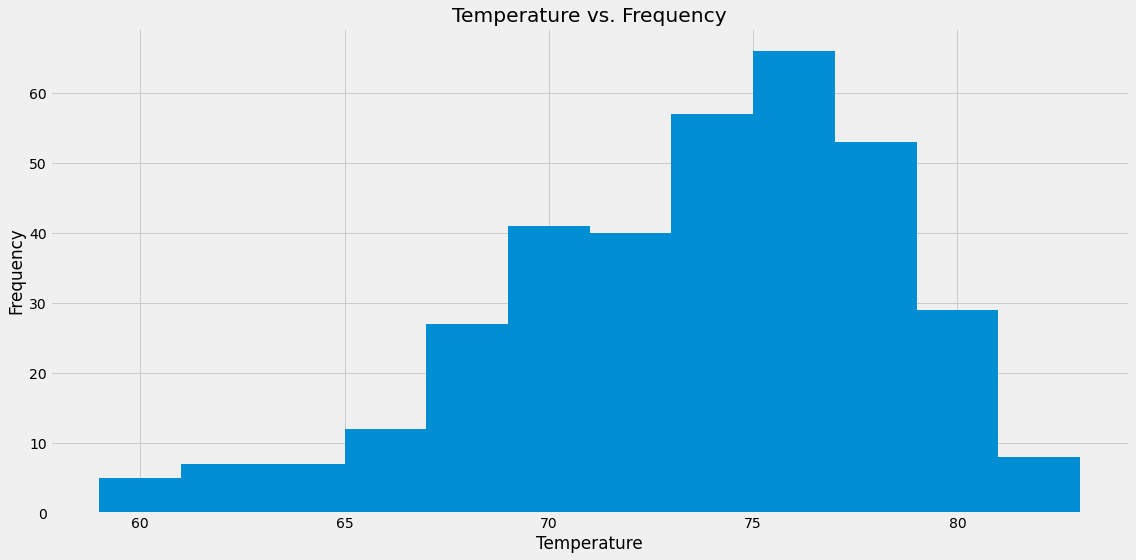

In [41]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data = session.query(measurement.tobs).\
    filter(measurement.date >= one_more_year).\
    filter(measurement.station == "USC00519281").\
    order_by(measurement.date).all()

# had to create a dataframe to generate histogram
temp_data_df = pd.DataFrame(data, columns=["TEMP"])
# data_df.head()

temp_data_df.plot.hist(bins=12, title="Temperature vs. Frequency", legend="", figsize=(16,8))
plt.xlabel("Temperature")
plt.tight_layout()
plt.show()

# Close session

In [26]:
# Close Session
session.close()